In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.neighbors import KernelDensity
import numpy as np
import pandas as pd

In [ ]:
class KDEClassifier(BaseEstimator, ClassifierMixin):
    # Parameters: bandwidth float (the kernel bandwidth within each class)
    # kernel str (kernel name, passed to Kernel Density)

    def __init__(self, bandwidth=1.0, kernel='gaussian'):
        self.bandwidth = bandwidth
        self.kernel = kernel

    def fit(self, X, y):
        self.classes_ = np.sort(np.unique(y))
        training_sets = [X[y == yi] for yi in self.classes_]
        self.models_ = [KernelDensity(bandwidth=self.bandwidth, kernel=self.kernel).fit(Xi) for Xi in training_sets]
        self.logpriors_ = [np.log(Xi.shape[0] / X.shape[0]) for Xi in training_sets]
        return self

    def predict_proba(self, X):
        logprobs = np.array([model.score_samples(X) for model in self.models_]).T
        result = np.exp(logprobs + self.logpriors_)
        return result / result.sum(1, keepdims=True)

    def predict(self, X):
        return self.classes_[np.argmax(self.predict_proba(X), 1)]

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV

In [ ]:
digits = load_digits()
bandwidths = 10**np.linspace(0, 2, 100)
grid = GridSearchCV(KDEClassifier(), {'bandwidth': bandwidths})
grid.fit(digits.data, digits.target)

# score = [val.mean_test_score for val in grid.cv_results_]
print(grid.best_params_)
print('accuracy =', grid.best_score_)

In [ ]:
# Benefit of generative classifier is interpretability of results - full model of the distribution of points
# Build with Gaussian Mixture Models

# Application to images
# Histogram of Oriented Gradients - transform image pixels into vector representation
# HOG prenormalizes images - independence of illumination to identify features
# Convolve imagines with two filters that are sensitive to horizontal and vertical brightness
# Subdivide image

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns;
sns.set()
from skimage import data, color, feature
import skimage.data

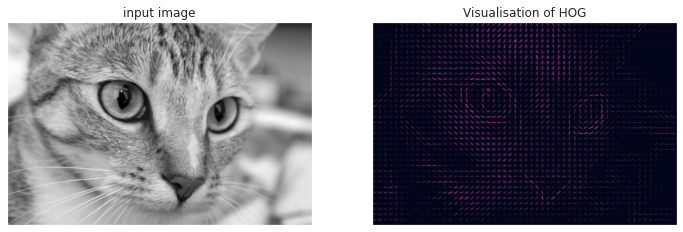

In [2]:
image = color.rgb2gray(data.chelsea())
hog_vec, hog_vis = feature.hog(image, visualize=True)
fig, ax = plt.subplots(1, 2, figsize=(12, 6), subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('input image')
ax[1].imshow(hog_vis)
ax[1].set_title('Visualisation of HOG')
plt.show()